<a href="https://colab.research.google.com/github/HardikxLabeitazer/DataScience-Practice-/blob/master/BasicML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [6]:
import mglearn as mglearn

In [5]:
!pip install -q mglearn

     |████████████████████████████████| 540 kB 5.0 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


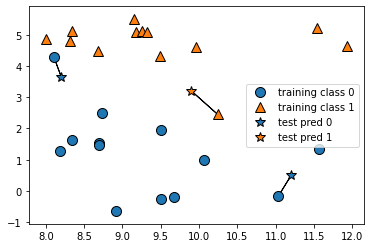

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [9]:
X,y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [10]:
X.shape

(26, 2)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KN
clf = KN(n_neighbors=3)

In [13]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [15]:
clf.score(X_test,y_test)

0.8571428571428571

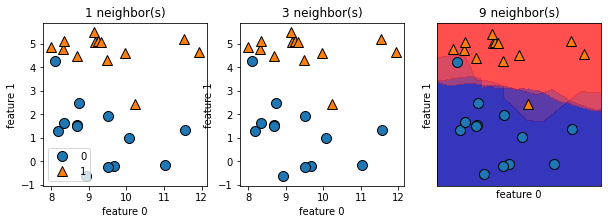

In [20]:
fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
  clf = KN(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")

axes[0].legend(loc=3)


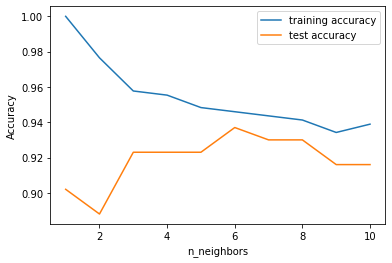

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KN(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [70]:
data1 = pd.DataFrame({'X':[-5,-4,-2,-1,0,1,2,3,4,5],
         'Y':[49.5,34.2,22.3,13.8,7.,8.7,13.8,22.3,34.2,49.5]})
data1

,X,Y
0,-5,49.5
1,-4,34.2
2,-2,22.3
3,-1,13.8
4,0,7.0
5,1,8.7
6,2,13.8
7,3,22.3
8,4,34.2
9,5,49.5


In [71]:
df = data1
df

,X,Y
0,-5,49.5
1,-4,34.2
2,-2,22.3
3,-1,13.8
4,0,7.0
5,1,8.7
6,2,13.8
7,3,22.3
8,4,34.2
9,5,49.5


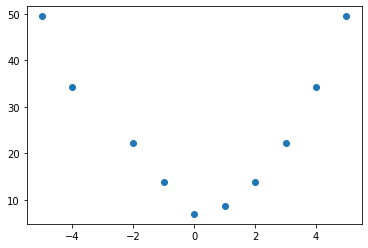

In [26]:
plt.scatter(df.X,df.Y)

In [75]:
df['NewFeature']= df['X'] * df['X']

In [76]:
df.head()

,X,Y,NewFeature
0,-5,49.5,25
1,-4,34.2,16
2,-2,22.3,4
3,-1,13.8,1
4,0,7.0,0


In [77]:
sample_X = df.drop('Y',axis=1)
sample_Y=df['Y']

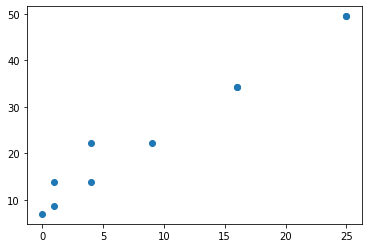

In [78]:
plt.scatter(df['NewFeature'],df['Y'])

In [79]:
from sklearn import linear_model

In [84]:
lr = linear_model.LinearRegression()
lr.fit(sample_X,sample_Y)

LinearRegression()

In [85]:
y_pred = lr.predict(sample_X)

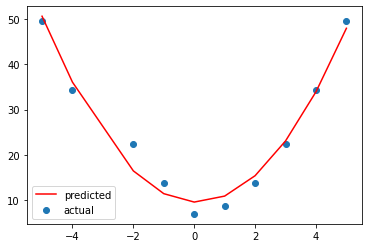

In [86]:
plt.scatter(sample_X['X'],sample_Y,label='actual')
plt.plot(sample_X['X'],y_pred,label='predicted',color='red')
plt.legend()

In [87]:
data2 = {'X':[-5,-4,-3,-2,-1,0,1,2,3,4,5],
 'Y':[-244, -122,  -48,  -10,    4,    6,    8,   22,   60,  134,  256]}

In [88]:
df2 = pd.DataFrame(data2)

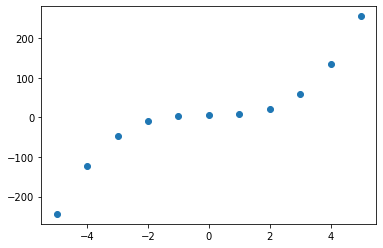

In [89]:
plt.scatter(df2['X'],df2['Y'])

In [90]:
df2['NewFeature']= df2['X']*df2['X']*df2['X']

In [91]:
X = df2.drop('Y',axis=1)
y = df2['Y']

In [92]:
lr.fit(X,y)
y_pred= lr.predict(X)

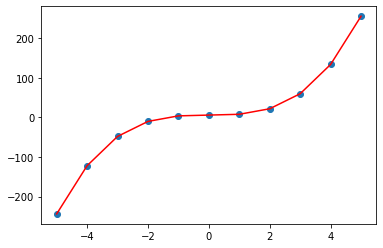

In [93]:
plt.scatter(df2['X'],df2['Y'],label='actual')
plt.plot(df2['X'],y_pred,label='pred',color='red')

In [94]:
data3 = {'X':[-5. , -4. , -3. , -2. , -1. ,0. ,  1. ,  2. ,  2.33333333,  2.66666667,3. ,  3.33333333,  3.66666667,  4. ,  4.33333333,4.66666667,  5. ,  5. ,  6. ,  7. ,8. ,  9. , 10. , 11. , 12.,13.],
         'Y': [-1.07984907e+02, -1.07958973e+02, -1.07888477e+02, -1.07696849e+02,-1.07175950e+02, -1.05760000e+02, -1.01911049e+02, -9.14485143e+01,-8.49005410e+01, -7.57621078e+01, -6.30083973e+01, -4.52091604e+01,-2.03683236e+01,  1.42998561e+01,  6.26831982e+01,  1.30207594e+02, 2.24445476e+02,  2.24445476e+02,  7.95680497e+02,  2.34845827e+03, 6.56934589e+03,  1.80429080e+04,  4.92312834e+04,  1.34010077e+05, 3.64462733e+05,  9.90897998e+05]}

df3 = pd.DataFrame(data3)

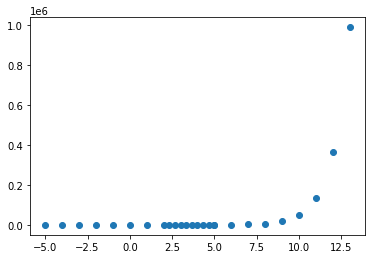

In [95]:
plt.scatter(df3['X'],df3['Y'])

In [96]:
df3.head()

,X,Y
0,-5.0,-107.984907
1,-4.0,-107.958973
2,-3.0,-107.888477
3,-2.0,-107.696849
4,-1.0,-107.175950


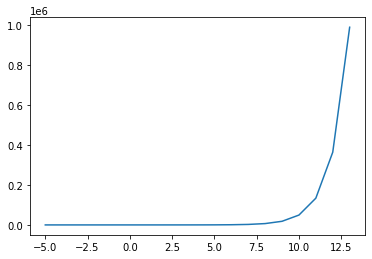

In [97]:
plt.plot(df3['X'],df3['Y'])

In [98]:
df3['NewFeature']=np.exp(df3['X'])
df3

,X,Y,NewFeature
0,-5.000000,-107.984907,0.006738
1,-4.000000,-107.958973,0.018316
2,-3.000000,-107.888477,0.049787
3,-2.000000,-107.696849,0.135335
4,-1.000000,-107.175950,0.367879
5,0.000000,-105.760000,1.000000
6,1.000000,-101.911049,2.718282
7,2.000000,-91.448514,7.389056
8,2.333333,-84.900541,10.312258
9,2.666667,-75.762108,14.391916


In [99]:
X = df3.drop('Y',axis=1)
y=df3['Y']

In [100]:
lr.fit(X,y)
y_predi = lr.predict(X)

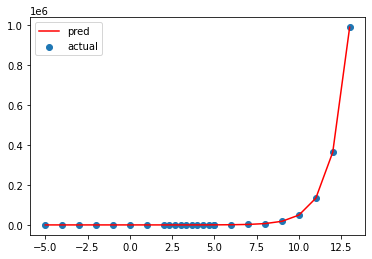

In [102]:
plt.scatter(df3['X'],df3['Y'],label='actual')
plt.plot(df3['X'],y_predi,label='pred',color='red')
plt.legend()
plt.show()

In [103]:
data5 = {'X' : [-180, -160, -140, -120, -100,  -80,  -60,  -40,  -20,    0,   20,40,   60,   80,  100,  120,  140,  160],
         'Y' : [-1.22464680e-16, -3.42020143e-01, -6.42787610e-01, -8.66025404e-01,       -9.84807753e-01, -9.84807753e-01, -8.66025404e-01, -6.42787610e-01,       -3.42020143e-01,  0.00000000e+00,  3.42020143e-01,  6.42787610e-01,        8.66025404e-01,  9.84807753e-01,  9.84807753e-01,  8.66025404e-01, 6.42787610e-01,  3.42020143e-01]   }
df4 = pd.DataFrame(data5)

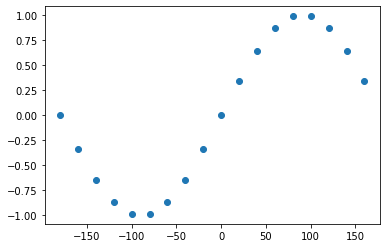

In [104]:
plt.scatter(df4['X'],df4['Y'])

In [105]:
df4.head()

,X,Y
0,-180,-1.224647e-16
1,-160,-3.420201e-01
2,-140,-6.427876e-01
3,-120,-8.660254e-01
4,-100,-9.848078e-01


In [124]:
df4['NewFeature']= np.exp(df4['X']/10000000)
df4.head()

,X,Y,NewFeature
0,-180,-1.224647e-16,0.999982
1,-160,-3.420201e-01,0.999984
2,-140,-6.427876e-01,0.999986
3,-120,-8.660254e-01,0.999988
4,-100,-9.848078e-01,0.999990


In [125]:
X_4 = df4.drop('Y',axis=1)
Y_4 = df4['Y']

In [126]:
lr.fit(X_4,Y_4)

LinearRegression()

In [129]:
y_pred4 = lr.predict(X_4)

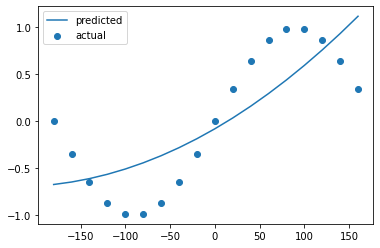

In [130]:
plt.scatter(df4['X'],df4['Y'],label='actual')
plt.plot(df4['X'],y_pred4,label='predicted')
plt.legend()
plt.show()

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/dataset/data3.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.sample(7)

,x1,x2,x3,Y
10,20,-19.736842,21.647507,6.258703e+09
12,18,-17.684211,12.222015,8.469914e+08
4,26,-25.894737,16.550852,2.524912e+12
15,15,-14.605263,28.551423,4.242647e+07
8,22,-21.789474,26.051254,4.624553e+10
27,3,-2.289474,26.411231,2.242051e+05
7,23,-22.815789,18.729799,1.257080e+11


In [132]:
import plotly.express as px

px.scatter_3d(df,x='x1',y ='x2',z='x3')

In [133]:
X= df.drop('Y',axis=1)
y = df['Y']

In [134]:
X.head()

,x1,x2,x3
0,30,-30.000000,3.908991
1,29,-28.973684,18.402618
2,28,-27.947368,22.617839
3,27,-26.921053,7.953191
4,26,-25.894737,16.550852


In [135]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(degree=10)
X = p.fit_transform(X);

In [136]:
X

array([[ 1.00000000e+00,  3.00000000e+01, -3.00000000e+01, ...,
         4.90636958e+07, -6.39298556e+06,  8.33004193e+05],
       [ 1.00000000e+00,  2.90000000e+01, -2.89736842e+01, ...,
         1.10419155e+13, -7.01326615e+12,  4.45447186e+12],
       [ 1.00000000e+00,  2.80000000e+01, -2.79473684e+01, ...,
         5.34922304e+13, -4.32913266e+13,  3.50357229e+13],
       ...,
       [ 1.00000000e+00, -6.00000000e+00,  6.94736842e+00, ...,
         1.60868531e+10,  2.69156313e+10,  4.50337430e+10],
       [ 1.00000000e+00, -7.00000000e+00,  7.97368421e+00, ...,
         2.54855099e+12,  6.76092632e+12,  1.79357309e+13],
       [ 1.00000000e+00, -8.00000000e+00,  9.00000000e+00, ...,
         1.33725883e+07,  6.67097435e+06,  3.32784483e+06]])

In [137]:
tmp = df['x1'].values
X= np.hstack([X,np.exp(tmp).reshape(-1,1)])

In [138]:
tmp2 = df['x2'].values

In [139]:
X= np.hstack([X,np.exp(tmp2).reshape(-1,1)])

In [140]:
tmp3 = df['x3'].values
X=np.hstack([X,np.exp(tmp3).reshape(-1,1)])

In [142]:
lg1 =df['x3'].values
X=np.hstack([X,np.log2(lg1).reshape(-1,1)])

In [145]:
X = pd.DataFrame(X)
X

""
